Fruit recognizer

An image classification model from data collection (scraping fruit types), cleaning, model training, deployment and API integration.
The model can classify 20 different types of fruits
The types are following:

In [23]:
 !pip install -U cfscrape

In [24]:
!pip install urllib3==1.26.6


In [25]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [26]:
import requests
import cfscrape
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import pickle
import random


In [27]:
 !pip install -Uqq fastai fastbook nbdev

In [28]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [29]:


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:

%cd /content/drive/MyDrive/Dataset/Fruit_recognizer

/content/drive/MyDrive/Dataset/Fruit_recognizer


In [38]:
url = "https://www.fruitsmith.com/blog/post/best-fruits-for-your-summer-diet"
scraper = cfscrape.create_scraper()
web_page = BeautifulSoup(scraper.get(url).text, "lxml")


In [39]:
headings = []
for heading in web_page.find_all('h3'): # all the chicken breed names were in h3 tag
    headings.append(heading.text.strip())

In [40]:

headings

['1. Mangoes',
 '2. Apples',
 '3. Pineapples',
 '4. Oranges',
 '5. Papaya',
 '6. Watermelon',
 '7. Muskmelon',
 '8. Blackberry',
 '9. Litchi',
 '10. Grapes',
 '11. Kiwi',
 '12. Plums',
 '13. Peaches',
 '14. Strawberries',
 '15. Tomato',
 '16. Cherry',
 '17. Bael',
 '18. Cucumber',
 '19. Mulberry',
 '20. Ice Apple']

In [41]:
fruits_list = [fruit.split('. ', 1)[1] for fruit in headings]

# Print the result
print(fruits_list)

['Mangoes', 'Apples', 'Pineapples', 'Oranges', 'Papaya', 'Watermelon', 'Muskmelon', 'Blackberry', 'Litchi', 'Grapes', 'Kiwi', 'Plums', 'Peaches', 'Strawberries', 'Tomato', 'Cherry', 'Bael', 'Cucumber', 'Mulberry', 'Ice Apple']


In [42]:
fruits_list

['Mangoes',
 'Apples',
 'Pineapples',
 'Oranges',
 'Papaya',
 'Watermelon',
 'Muskmelon',
 'Blackberry',
 'Litchi',
 'Grapes',
 'Kiwi',
 'Plums',
 'Peaches',
 'Strawberries',
 'Tomato',
 'Cherry',
 'Bael',
 'Cucumber',
 'Mulberry',
 'Ice Apple']

In [43]:
with open("fruits", "wb") as fp:
    pickle.dump(fruits_list, fp)

In [44]:
# load the pickle file
with open("fruits", "rb") as fp:
    fruits_list = pickle.load(fp)

In [45]:
fruits_list

['Mangoes',
 'Apples',
 'Pineapples',
 'Oranges',
 'Papaya',
 'Watermelon',
 'Muskmelon',
 'Blackberry',
 'Litchi',
 'Grapes',
 'Kiwi',
 'Plums',
 'Peaches',
 'Strawberries',
 'Tomato',
 'Cherry',
 'Bael',
 'Cucumber',
 'Mulberry',
 'Ice Apple']

In [46]:
images = search_images_ddg(fruits_list[0], max_images=200)
f"No of image => {len(images)} -- One Image Url => {images[0]}"

'No of image => 200 -- One Image Url => https://d279m997dpfwgl.cloudfront.net/wp/2019/06/0618_mangoes03.jpg'

In [47]:
dest = "Mangoes.jpg"
download_url(images[0], dest, show_progress=False)

Path('Mangoes.jpg')

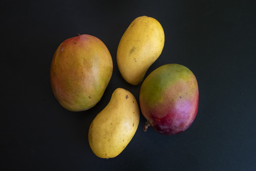

In [48]:
image = Image.open(dest)
image.to_thumb(256, 256)

In [49]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for fruit in fruits_list:

  dest = f"{data_path}/{fruit}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    fruit_image_urls = search_images_ddg(fruit)
    download_images(dest, urls = fruit_image_urls)

  except:
    continue

In [50]:
image_counts = get_image_files(data_path)
image_counts

(#3559) [Path('data/Mangoes/4a471db8-3d4f-4c2d-a5f1-a7d85b48ae84.jpg'),Path('data/Mangoes/36b95765-56a8-4e33-97a4-8bc1acaab240.png'),Path('data/Mangoes/effb6ed8-28a7-416a-bbf0-8806dc03ed43.jpg'),Path('data/Mangoes/32523466-88da-40ad-b425-db264d502836.jpg'),Path('data/Mangoes/debb74d8-4dfc-4daa-825b-6b63b5a0f15d.jpg'),Path('data/Mangoes/d629a792-e44d-4f04-803b-8b99b5bcca87.gif'),Path('data/Mangoes/24ba65ad-5999-44b1-8f38-c0fc80f004f7.jpeg'),Path('data/Mangoes/9b48a9fa-9e11-43e3-88a6-3d9a9fbd27e2.jpg'),Path('data/Mangoes/95aa1691-29af-4e8f-b253-ac8f2d116610.jpg'),Path('data/Mangoes/2b493e22-9356-4f34-9349-2c925223deae.jpg')...]

In [51]:
failed = verify_images(image_counts)
failed

(#98) [Path('data/Mangoes/ddad6496-3a7d-4c88-a99c-28185d467741.jpg'),Path('data/Apples/b5b417a1-3994-439a-a875-0db813ae80d3.jpg'),Path('data/Apples/ea8a34f4-8cf6-4c20-8dc6-17594ef11224.jpg'),Path('data/Apples/0ef9a62a-62d3-4ae7-8a24-f9bf2493b345.jpg'),Path('data/Apples/b251d738-b5bf-41b1-8949-dcef00da0970.png'),Path('data/Apples/8eb2a394-6790-4818-a95c-7c7741c82075.jpg'),Path('data/Apples/6f9d9e58-2e31-47cc-aea9-9700a1ff9746.jpg'),Path('data/Apples/d4a102eb-4824-437b-8a9b-eb873cf5aa08.jpg'),Path('data/Apples/830dea00-f8ba-4f17-a6b4-f31c23b0f5fe.png'),Path('data/Apples/c2733bb6-cf60-4c76-8846-ae3027381f3c.jpg')...]

In [52]:
failed.map(Path.unlink)

(#98) [None,None,None,None,None,None,None,None,None,None...]

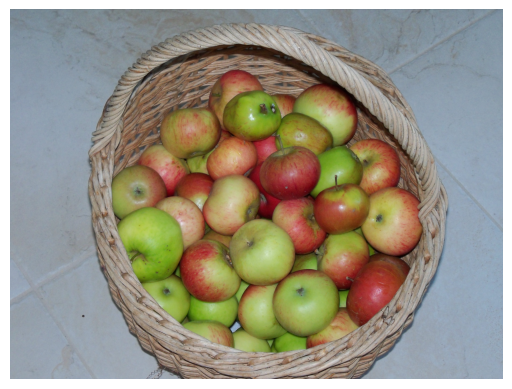

In [54]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Dataset/Fruit_recognizer/data/Apples/01643d29-f8ac-496c-9737-d7b3171c7cc7.jpg'
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


# From data to **dataloaders**

In [55]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))

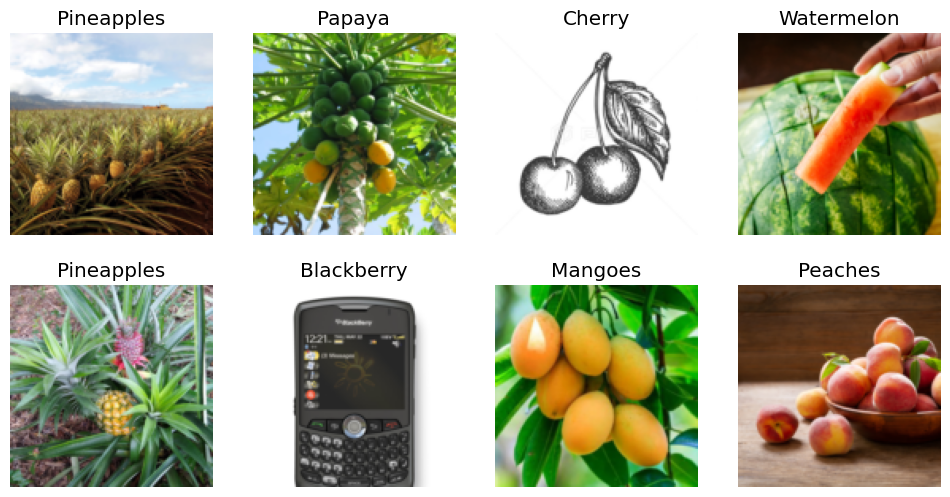

In [56]:


dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use
dls.train.show_batch(max_n=8, nrows=2)

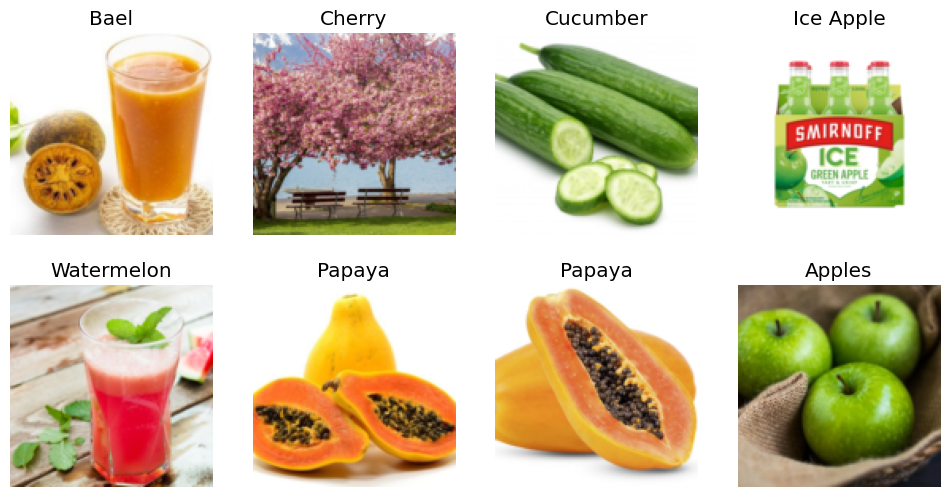

In [57]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data augmentation

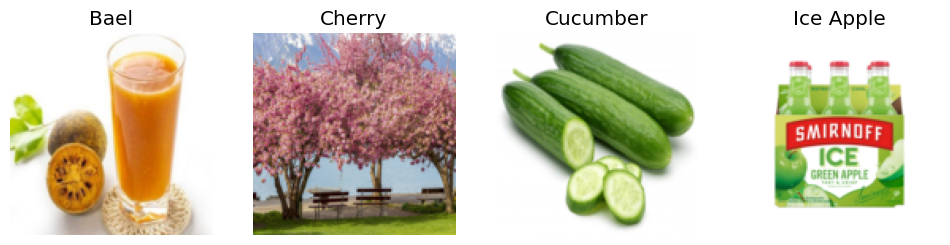

In [58]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

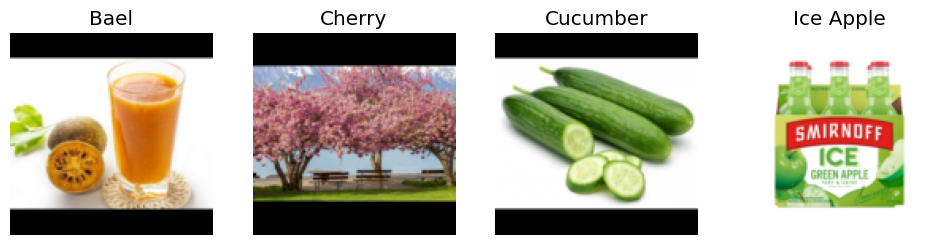

In [59]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

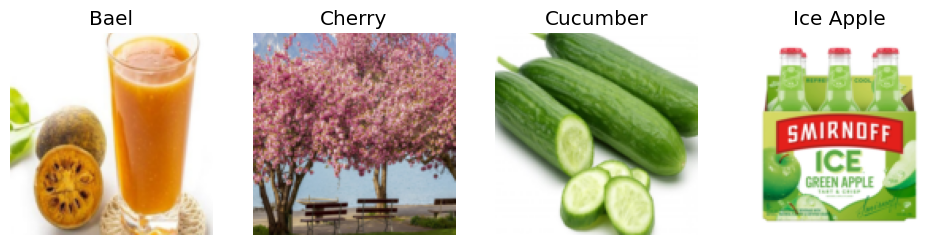

In [60]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


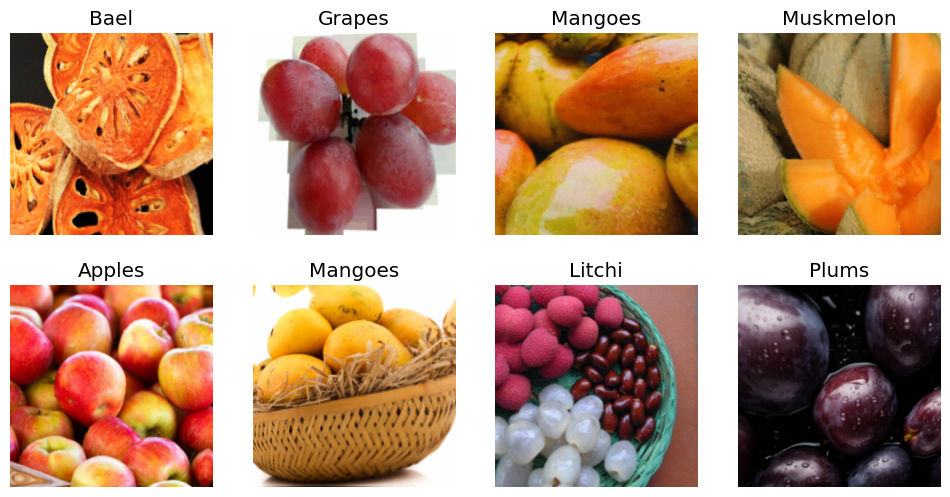

In [61]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [62]:
torch.save(dls, "fruit_dataloader_v0.pkl")